### Obtain a dataset of sales records. Use Pandas to load, filter records based on a condition (e.g., sales greater than $500) , and use the groupby() method to aggregate total sales by region or product category. Create a descriptive report that includes describe() and info() outputs and a summary of the aggregated statistics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Generate a synthetic sales dataset
np.random.seed(42)
regions = ['North', 'South', 'East', 'West']
categories = ['Electronics', 'Furniture', 'Clothing', 'Groceries']

data = {
    'Order_ID': np.arange(1, 301),
    'Region': np.random.choice(regions, 300),
    'Category': np.random.choice(categories, 300),
    'Sales': np.random.randint(100, 2000, 300),
    'Quantity': np.random.randint(1, 10, 300)
}

sales_df = pd.DataFrame(data)
sales_df.head()


,Order_ID,Region,Category,Sales,Quantity
0,1,East,Electronics,976,8
1,2,West,Electronics,1091,9
2,3,North,Clothing,983,7
3,4,East,Furniture,1473,1
4,5,East,Furniture,146,3


In [3]:
# Display dataset information
print("Dataset Info:")
print("="*40)
sales_df.info()

print("\nDescriptive Statistics:")
print("="*40)
display(sales_df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  300 non-null    int64 
 1   Region    300 non-null    object
 2   Category  300 non-null    object
 3   Sales     300 non-null    int64 
 4   Quantity  300 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.8+ KB

Descriptive Statistics:


,Order_ID,Sales,Quantity
count,300.000000,300.000000,300.000000
mean,150.500000,1104.343333,4.853333
std,86.746758,512.948835,2.597623
min,1.000000,111.000000,1.000000
25%,75.750000,733.000000,3.000000
50%,150.500000,1135.500000,5.000000
75%,225.250000,1516.250000,7.000000
max,300.000000,1992.000000,9.000000


In [4]:
# Filter records where sales are greater than $500
high_sales_df = sales_df[sales_df['Sales'] > 500]
print(f"Total Records with Sales > 500: {len(high_sales_df)}")

# Display first few records
high_sales_df.head()


Total Records with Sales > 500: 254


,Order_ID,Region,Category,Sales,Quantity
0,1,East,Electronics,976,8
1,2,West,Electronics,1091,9
2,3,North,Clothing,983,7
3,4,East,Furniture,1473,1
5,6,West,Electronics,966,9


In [5]:
# Group by Region and Category, aggregate total and mean sales
aggregated_sales = (
    high_sales_df.groupby(['Region', 'Category'])
    .agg(
        Total_Sales=('Sales', 'sum'),
        Average_Sales=('Sales', 'mean'),
        Total_Orders=('Order_ID', 'count')
    )
    .reset_index()
)

aggregated_sales


,Region,Category,Total_Sales,Average_Sales,Total_Orders
0,East,Clothing,16875,1205.357143,14
1,East,Electronics,12675,1267.500000,10
2,East,Furniture,24290,1349.444444,18
3,East,Groceries,27328,1438.315789,19
4,North,Clothing,17353,1239.500000,14
5,North,Electronics,24431,1285.842105,19
6,North,Furniture,20130,1258.125000,16
7,North,Groceries,22007,1375.437500,16
8,South,Clothing,17065,1218.928571,14
9,South,Electronics,7817,1302.833333,6


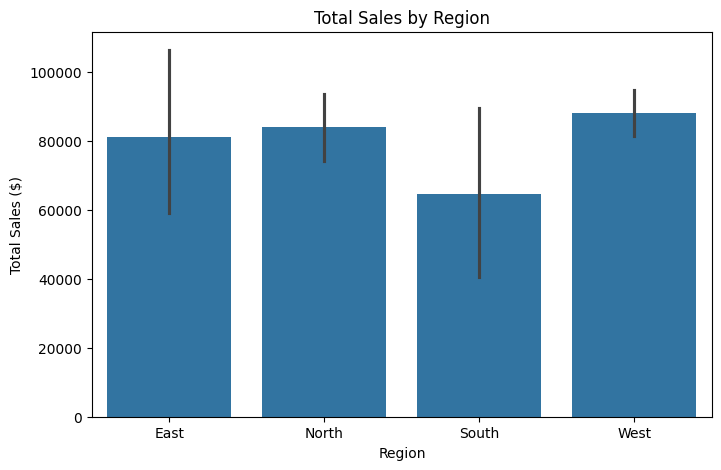

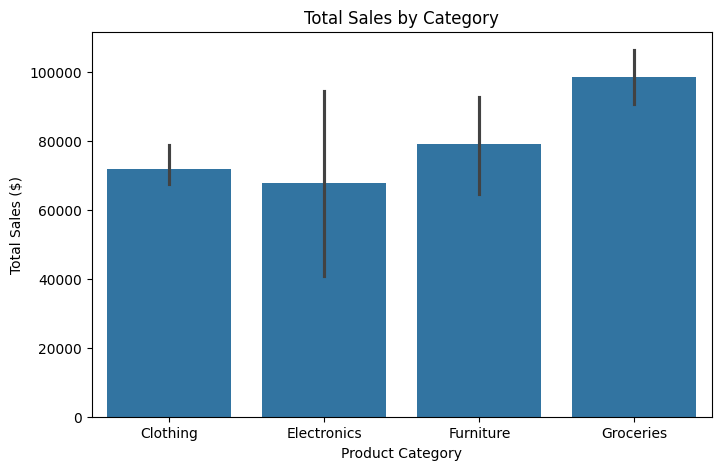

In [6]:
# Visualization: Total Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=aggregated_sales, estimator=sum)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.show()

# Visualization: Total Sales by Product Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Total_Sales', data=aggregated_sales, estimator=sum)
plt.title("Total Sales by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.show()


In [7]:
print("=== DESCRIPTIVE REPORT ===\n")
print("1️⃣ Dataset Overview:")
print(f"Total Records: {len(sales_df)}")
print(f"Records with Sales > 500: {len(high_sales_df)}\n")

print("2️⃣ Aggregated Sales Summary:")
display(aggregated_sales.describe())

print("\n3️⃣ Insights:")
print("- Highest total sales region:", aggregated_sales.loc[aggregated_sales['Total_Sales'].idxmax(), 'Region'])
print("- Highest selling category:", aggregated_sales.loc[aggregated_sales['Total_Sales'].idxmax(), 'Category'])
print("- Average order size:", round(high_sales_df['Sales'].mean(), 2))


=== DESCRIPTIVE REPORT ===

1️⃣ Dataset Overview:
Total Records: 300
Records with Sales > 500: 254

2️⃣ Aggregated Sales Summary:


,Total_Sales,Average_Sales,Total_Orders
count,16.00000,16.000000,16.000000
mean,19851.43750,1256.813204,15.875000
std,5171.71796,97.752027,4.240676
min,7817.00000,1079.478261,6.000000
25%,17017.50000,1215.535714,14.000000
50%,20383.00000,1262.812500,16.000000
75%,24325.25000,1310.525000,19.000000
max,27328.00000,1438.315789,23.000000



3️⃣ Insights:
- Highest total sales region: East
- Highest selling category: Groceries
- Average order size: 1250.48
